In [2]:
library(tidyverse)
library(data.table)
library(EvolutionaryGames)
library(ggthemes)
library(latex2exp)
library(ggtext)

# 排名？？咋整

In [39]:
duplicate_dynamic<-function(y,M,beta,d,N,c,pow){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
    
  #这里决定用N-1
  #需要取整
    # 这里有点没懂 换成N就不行了  # floor 返回小于输入值的最大整数值 Nd最大为98，Nc最大为99
  
  

  
  #群体体选择策略c或d的收益  = 概率*pai
  # 累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
    Pc=0
    Pd=0
#     pow = -1.5
    #第n名获得资源的比重为 k*n^pow
    for (Nd in 0:(N-1)){ 
        Nc<- N-1-Nd
        pai_c = 0
        pai_d = 0
        weight_c = 0
        weight_d = 0            #若选择c、d策略，c和d分别的总权重
        for (n in 1:(Nd+1)){
            weight_d  <- weight_d + n^pow
        }
        for (n in (Nd+1):N){
            weight_c <- weight_c + n^pow
        }
        weight_all <- weight_c+weight_d-(Nd+1)^pow

        pai_c <- weight_c/weight_all*M/(Nc+1)-c
        pai_d <- weight_d/weight_all*M/(Nd+1)-d
          #策略c（cooperate, less effort）和策略d(defect，more effort)的收益
          #（1）个体选择策略c的期望收益
#         pai_c<-(c*M)/((Nc+1)*c+Nd*beta*d)-c
          #（2）个体选择策略d的期望收益
#         pai_d<-(beta*d*M)/(Nc*c+(Nd+1)*beta*d)-d
        Pc=Pc+(choose(N-1, Nd)*(y^Nd)*((1-y)^(N-Nd-1)))*pai_c
        Pd=Pd+(choose(N-1, Nd)*(y^Nd)*((1-y)^(N-Nd-1)))*pai_d
        #choose计算组合数
  }
 #choose计算组合数
  
  #（3）群体选择策略d的平均收益
  R_<-y*Pd+(1-y)*Pc
  
  #(4)复制动态方程
  #y.<-y(Pd-R_) = y(Pd-y*Pd-(1-y)*Pc) = y(1-y)(Pd-Pc)
  y.<-y*(1-y)*(Pd-Pc)
    if (is.na(y.)){
        y.<-0
    }
    return(y.)
}

In [40]:
plot_y._y<-function(M,pow){
  y.<-c()
  
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta=1,d=4,N=5,c=1,pow)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
  
  #ystar<-df$x[df$y0<0]+0.005 #即横坐标
  
  ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  
  ggplot(df,aes(x=x,y=y))+
    geom_line(color="black",size=0.3)+
    theme_few() +
    geom_point(aes(x=ystar,y=0))+
    geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
    geom_hline(aes(yintercept = 0),size=0.3)+
    labs(x = "y", y = "y.")
}

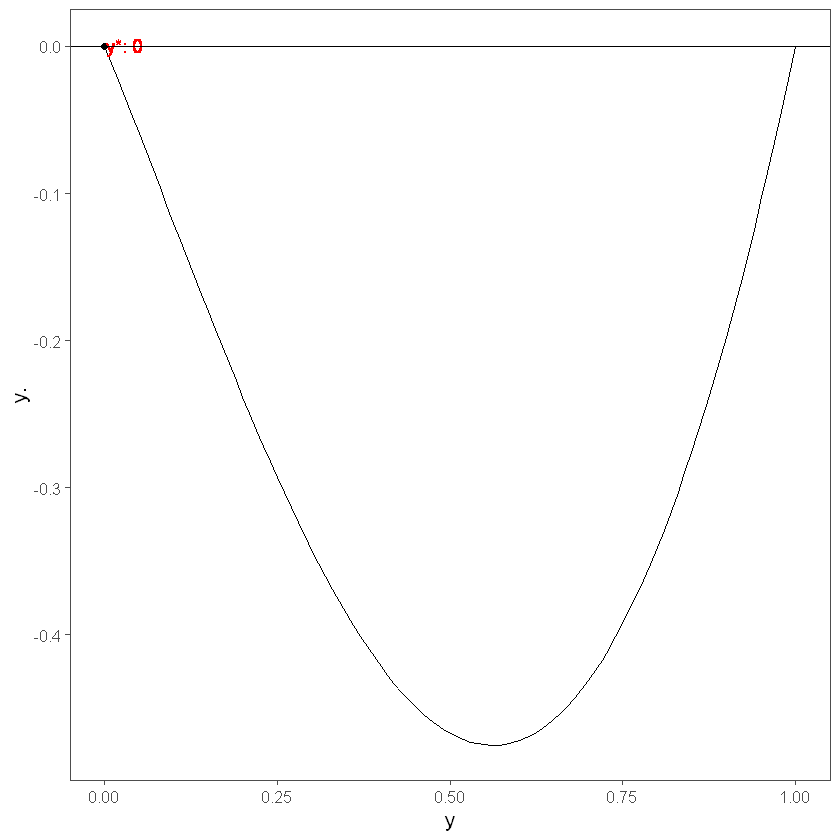

In [41]:
plot_y._y(5,-1.5)

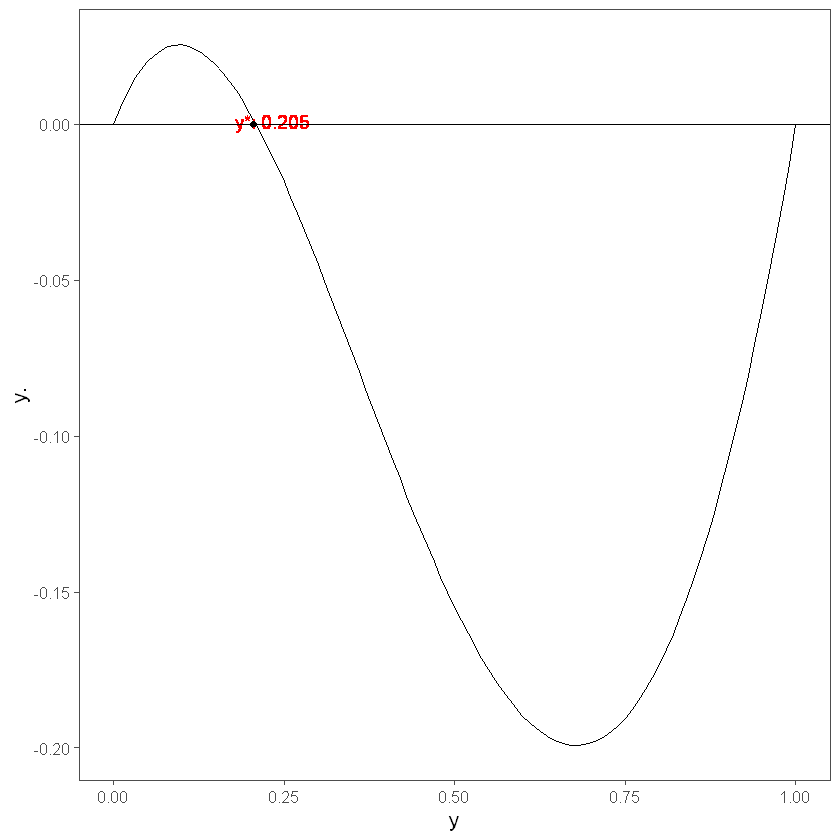

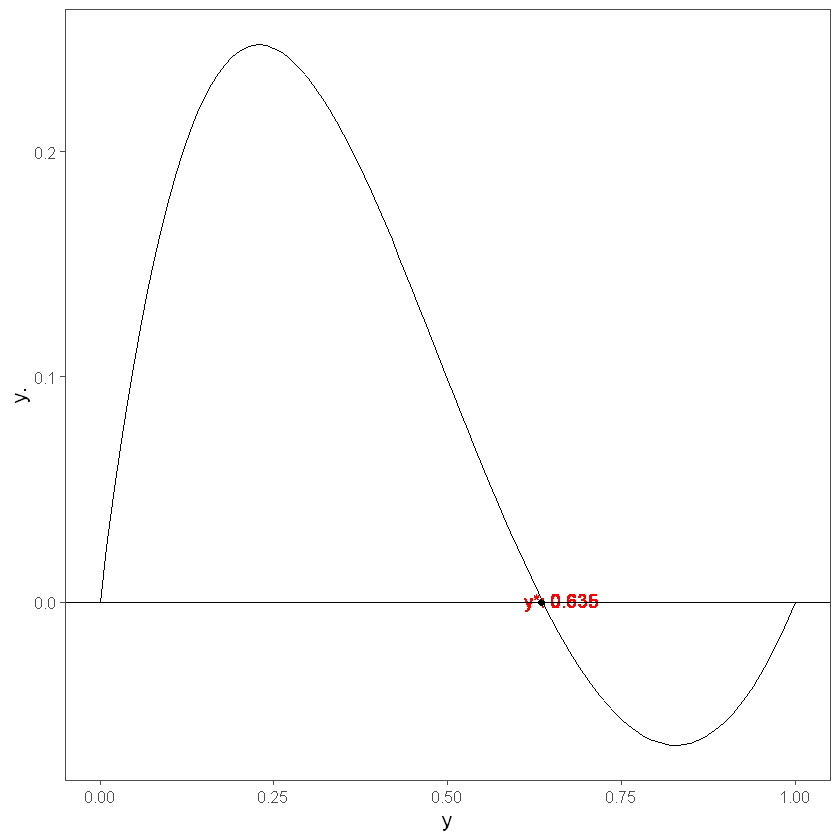

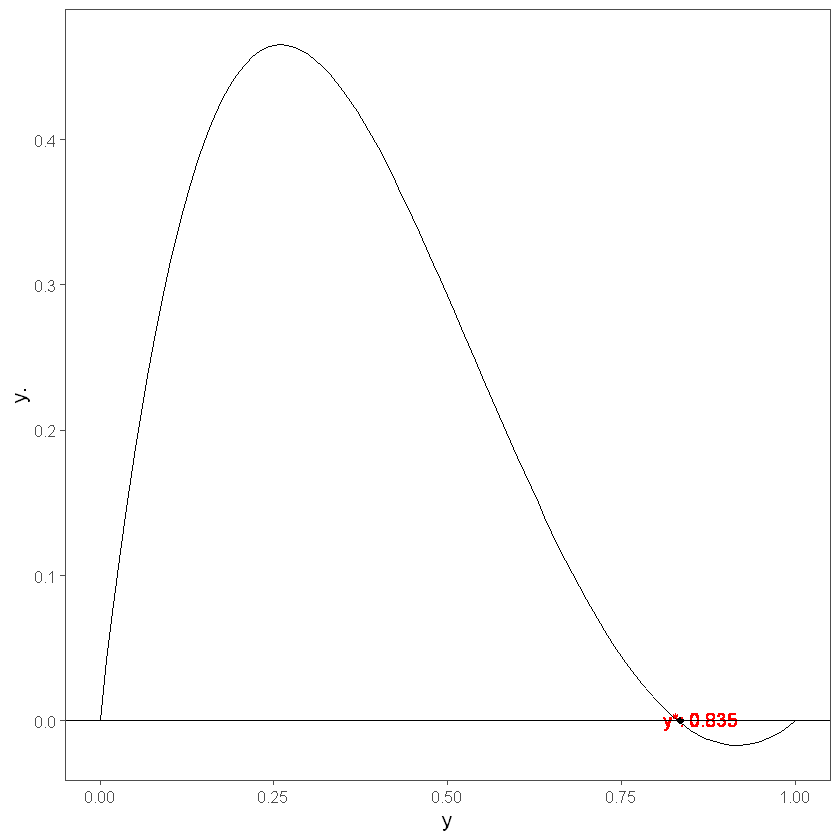

In [42]:
plot_y._y(15,-1)
plot_y._y(15,-1.5)
plot_y._y(15,-2)

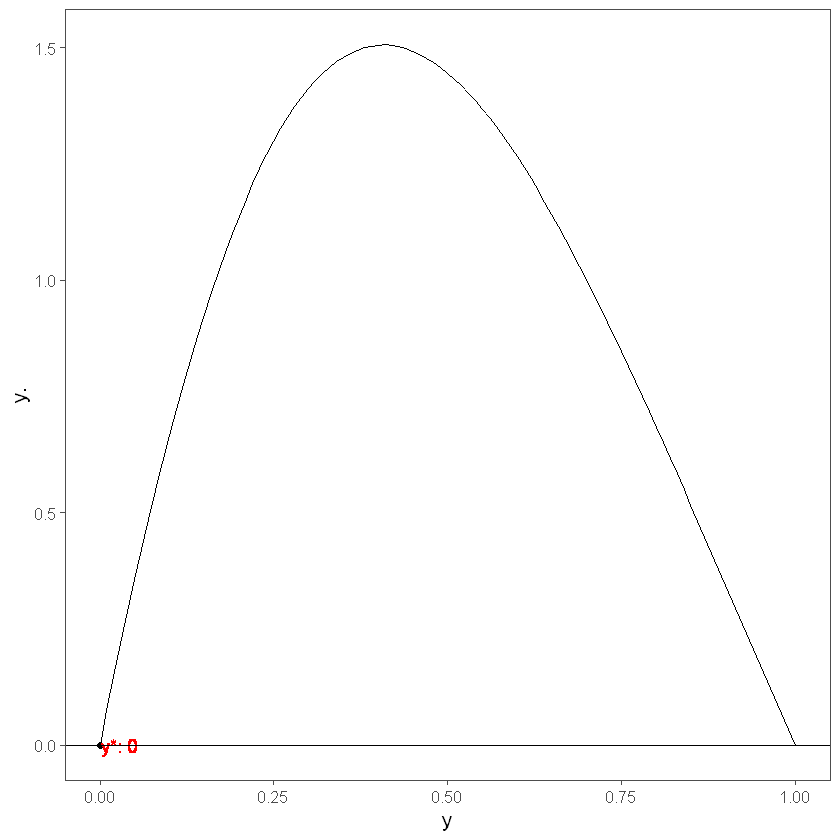

In [38]:
plot_y._y(45)

# 3策略 试试看


In [ ]:
duplicate_dynamic<-function(y,x,M,beta1,,beta2,d,N,c,l){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
    
  #这里决定用N-1
  #需要取整
    # 这里有点没懂 换成N就不行了  # floor 返回小于输入值的最大整数值 Nd最大为98，Nc最大为99
  
  

  
  #群体体选择策略c或d的收益  = 概率*pai
  # 累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
    Pc=0
    Pd=0
    Pl = 0 
    pow = -1.5
    k = 1
    for (Nd in 0:(N-1)){ 
        for (Nl in 0:(N-1-Nd)){
            Nc = N-1-Nd-Nl
            pai_d = beta1*d/(beta1*(Nd+1)*d+beta2*Nc*c+Nl*l)
            pai_c = beta2*c/(beta1*Nd*d+beta2*Nc*c+Nl*l)
            pai_l = l/(beta1*Nd*d+beta2*Nc+(Nl+1)*l)
            Pd = Pd + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_d
            Pc = Pc + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_c
            Pl = Pl + choose(N-1,Nd)*choose(N-1-Nd,Nl)*y^Nd*(1-x-y)^Nc*x^Nl*pai_l
        }
        R_y<-y*Pd+(1-y)*x*Pc+(1-y)*(1-x)*Pl
        


}
    }